# Zillow Data Acquisition and prep phase

1. #### Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats as stats


import warnings
warnings.filterwarnings("ignore")

import acquire as aq
import wrangle as wr

### Aquire Zillow Data

In [2]:
zillow_df = aq.get_zillow_data()

### Check Dtypes

In [3]:
zillow_df.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
yearbuilt                       float64
taxamount                       float64
taxvaluedollarcnt               float64
fips                            float64
dtype: object

### Check the count, and look for nulls 

In [4]:
zillow_df.count()

bathroomcnt                     2152852
bedroomcnt                      2152852
calculatedfinishedsquarefeet    2144379
yearbuilt                       2143526
taxamount                       2148421
taxvaluedollarcnt               2152370
fips                            2152863
dtype: int64

### Check the null count

In [5]:
zillow_df.isnull().mean()

bathroomcnt                     0.000005
bedroomcnt                      0.000005
calculatedfinishedsquarefeet    0.003941
yearbuilt                       0.004337
taxamount                       0.002063
taxvaluedollarcnt               0.000229
fips                            0.000000
dtype: float64

In [6]:
null_cols = zillow_df.columns[zillow_df.isnull().any()]
zillow_df[null_cols].isnull().sum()

bathroomcnt                       11
bedroomcnt                        11
calculatedfinishedsquarefeet    8484
yearbuilt                       9337
taxamount                       4442
taxvaluedollarcnt                493
dtype: int64

### Drop nulls in the dataframe

In [7]:
df = zillow_df.dropna()

### Before...

In [8]:
zillow_df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,taxvaluedollarcnt,fips
0,0.0,0.0,NaN,NaN,NaN,27516.0,6037.0
1,0.0,0.0,NaN,NaN,NaN,10.0,6037.0
2,0.0,0.0,NaN,NaN,NaN,10.0,6037.0
3,0.0,0.0,NaN,NaN,174.21,2108.0,6037.0
4,2.0,4.0,3633.0,2005.0,6941.39,296425.0,6037.0
...,...,...,...,...,...,...,...
2152858,3.0,4.0,2262.0,2015.0,13494.52,960756.0,6059.0
2152859,4.5,4.0,3127.0,2014.0,6244.16,536061.0,6059.0
2152860,0.0,0.0,NaN,NaN,5783.88,208057.0,6059.0
2152861,2.5,3.0,1974.0,2015.0,5302.70,424353.0,6059.0


### After...

In [9]:
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,taxvaluedollarcnt,fips
4,2.0,4.0,3633.0,2005.0,6941.39,296425.0,6037.0
6,4.0,3.0,1620.0,2011.0,10244.94,847770.0,6037.0
7,2.0,3.0,2077.0,1926.0,7924.68,646760.0,6037.0
11,0.0,0.0,1200.0,1972.0,91.60,5328.0,6037.0
14,0.0,0.0,171.0,1973.0,255.17,6920.0,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,2015.0,13877.56,422400.0,6037.0
2152858,3.0,4.0,2262.0,2015.0,13494.52,960756.0,6059.0
2152859,4.5,4.0,3127.0,2014.0,6244.16,536061.0,6059.0
2152861,2.5,3.0,1974.0,2015.0,5302.70,424353.0,6059.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bathroomcnt                   float64
 1   bedroomcnt                    float64
 2   calculatedfinishedsquarefeet  float64
 3   yearbuilt                     float64
 4   taxamount                     float64
 5   taxvaluedollarcnt             float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


### Renaming columns : 

In [11]:
df = df.rename(columns = {'bedroomcnt': 'bedrooms', 'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'sqft', 'yearbuilt':'year_built', 
                          'taxamount':'tax_amount', 'taxvaluedollarcnt':'tax_value'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bathrooms   float64
 1   bedrooms    float64
 2   sqft        float64
 3   year_built  float64
 4   tax_amount  float64
 5   tax_value   float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.6 MB


### Visualizing distributions and exploring data

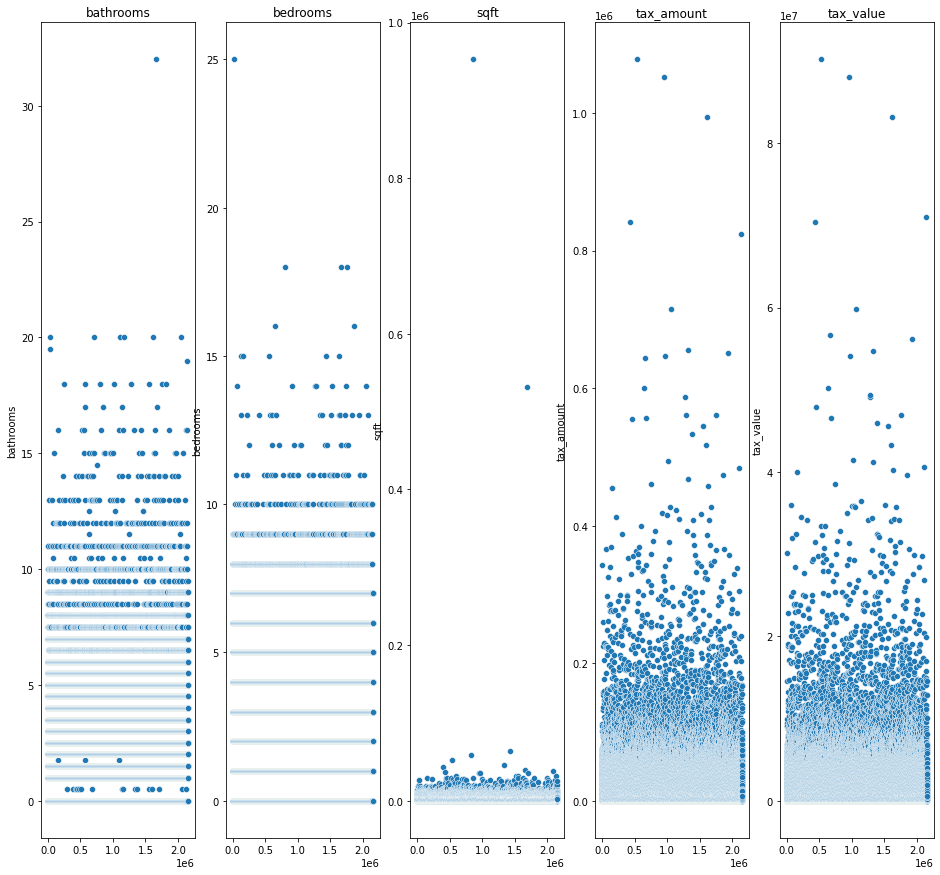

In [13]:
plt.figure(figsize=(16, 15))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display scatterplot for column.
    sns.scatterplot(data=df[col])

    # Hide gridlines.
    plt.grid(False)


### Outliers:
- There are quite a few outliers in the data (the home with 25 bedrooms that is less than even 100k) so we will use quartile .25 and .75 to calculate the interquartile range and remove outliers.

In [14]:
# function to calculate quartile range and remove outliers
def omit_outliers(df, calc, columns):
    for col in columns:
        
        # select quartiles
        q1, q3 = df[col].quantile([.25,.75]) 
        
        # calculate interquartile range
        iqr = q3 - q1
        
        upper_bound = q3 + calc * iqr
        lower_bound = q1 - calc * iqr
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [15]:
column_list = df.columns
df = omit_outliers(df, 1.5, column_list)

#### Check outliers

In [16]:
for col in df.columns:
    print(col)
    print(df[col].max())
    print( )

bathrooms
4.0

bedrooms
5.0

sqft
3408.0

year_built
2008.0

tax_amount
11008.22

tax_value
882676.0

fips
6059.0



### Takeaway:

I want to eventually change fips to a string since they represent counties, and change float values to integers

### Second Vizualization without outliers

bathrooms


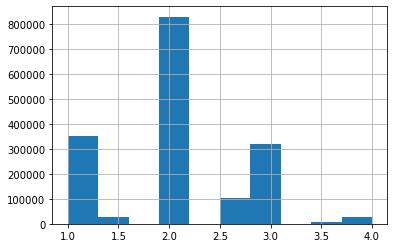

bedrooms


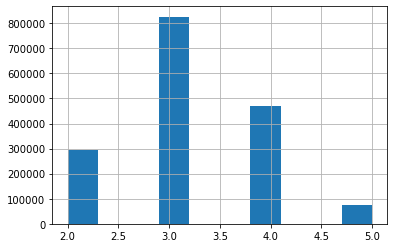

sqft


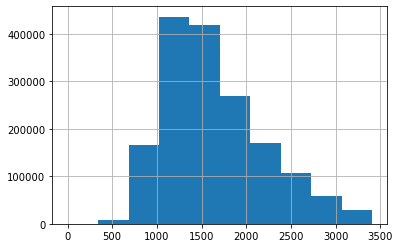

year_built


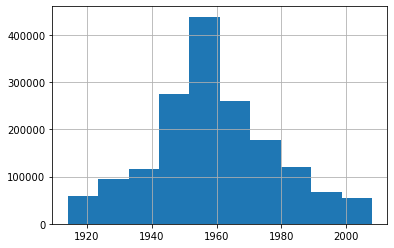

tax_amount


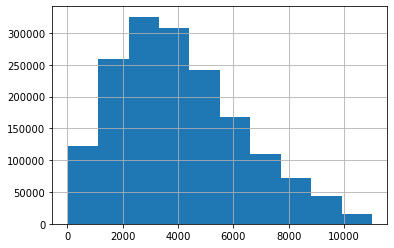

tax_value


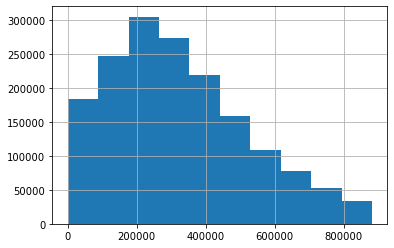

fips


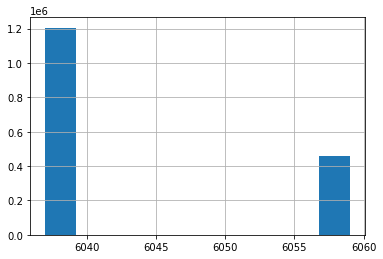

In [17]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()


### Alter fips to match appropriate county

In [18]:
zillow_df.fips.value_counts()

6037.0    1431811
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [19]:
df.fips.value_counts()

6037.0    1205076
6059.0     459728
Name: fips, dtype: int64

#### Fip codes:
6037 : Los Angeles
6059 : Orange County
6111 : Ventura

In [20]:
df.fips = df.fips.map({6037.0: 'Los Angeles', 6059.0:'Orange County'})

### Create function for wrangling data

In [21]:
# function to calculate quartile range and remove outliers
def omit_outliers(df, calc, columns):
    for col in columns:
        
        # select quartiles
        q1, q3 = df[col].quantile([.25,.75]) 
        
        # calculate interquartile range
        iqr = q3 - q1
        
        upper_bound = q3 + calc * iqr
        lower_bound = q1 - calc * iqr
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df



In [22]:
def wrangle_zillow():
    zillow_df = aq.get_zillow_data()
    df = zillow_df.dropna()
    df = df.rename(columns = {'bedroomcnt': 'bedrooms', 'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'sqft', 'yearbuilt':'year_built', 
                          'taxamount':'tax_amount', 'taxvaluedollarcnt':'tax_value'})
    
    column_list = df.columns[0:-1]
    df = omit_outliers(df, 1.5, column_list)
    
    df.fips = df.fips.map({6037.0: 'Los Angeles', 6059.0:'Orange County', 6111.0:'Ventura County'})
    
    return df

### Test function from .py file

In [23]:
test_wrangle = wr.wrangle_zillow()

In [24]:
test_wrangle.head()

,bathrooms,bedrooms,sqft,year_built,tax_amount,tax_value,fips
7,2.0,3.0,2077.0,1926.0,7924.68,646760.0,Los Angeles
18,1.0,3.0,1244.0,1950.0,2532.88,169471.0,Los Angeles
19,2.0,3.0,1300.0,1950.0,3110.99,233266.0,Los Angeles
20,2.0,3.0,1222.0,1951.0,3870.25,290492.0,Los Angeles
40,1.0,2.0,725.0,1953.0,576.47,37548.0,Los Angeles


In [25]:
zillow_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bathroomcnt                   2152852 non-null  float64
 1   bedroomcnt                    2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   yearbuilt                     2143526 non-null  float64
 4   taxamount                     2148421 non-null  float64
 5   taxvaluedollarcnt             2152370 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [26]:
test_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807580 entries, 7 to 2152853
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bathrooms   float64
 1   bedrooms    float64
 2   sqft        float64
 3   year_built  float64
 4   tax_amount  float64
 5   tax_value   float64
 6   fips        object 
dtypes: float64(6), object(1)
memory usage: 110.3+ MB
